<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/NM/%D0%9D%D0%B5%D1%87%D0%B5%D1%82%D0%BA%D0%B0%D1%8F_%D0%BB%D0%BE%D0%B3%D0%B8%D0%BA%D0%B0_(fuzzy_logic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.2 MB/s eta 0:00:00


Датасет:
   Price  Volume   Change
0    100    5000   Growth
1    105    7000   Growth
2    110    8000   Growth
3     95    4000  Decline
4    102    6000   Stable
5     98    4500  Decline
6    103    7500   Growth
7    107    8500   Growth
8    104    5500   Stable
9    106    6500   Growth


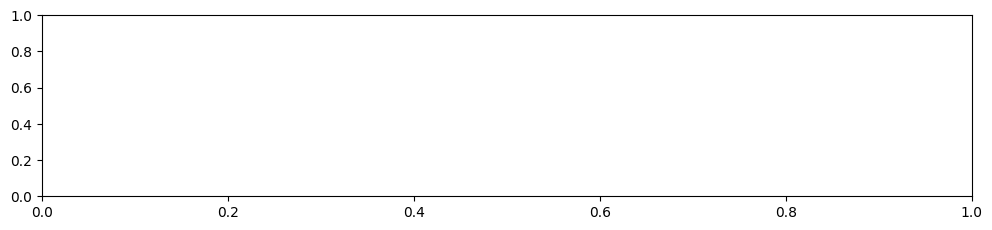

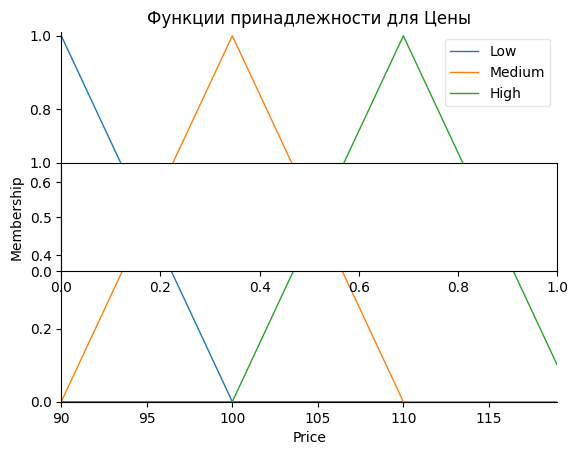

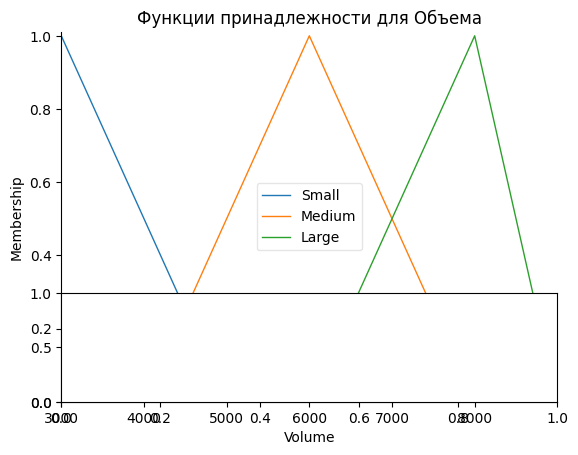

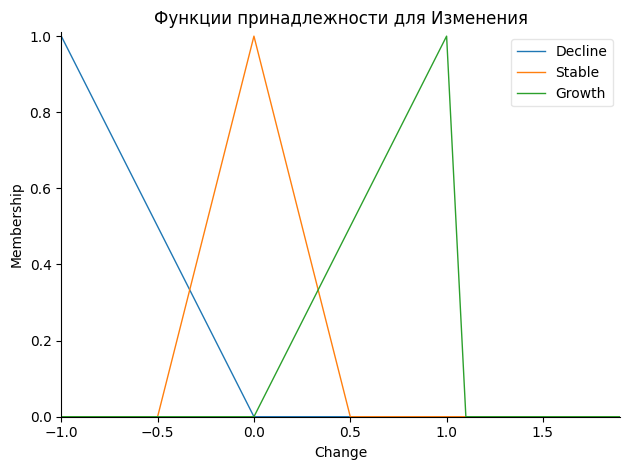

Ошибка при вычислении для Price=102, Volume=6000: 'Change'

Прогнозы:
Цена: 105, Объем: 7000 → Growth
Цена: 98, Объем: 4500 → Stable
Цена: 102, Объем: 6000 → Undefined
Не удалось построить график, так как результат не определён.


In [8]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Шаг 1: Создание датасета
data = {
    'Price': [100, 105, 110, 95, 102, 98, 103, 107, 104, 106],
    'Volume': [5000, 7000, 8000, 4000, 6000, 4500, 7500, 8500, 5500, 6500],
    'Change': ['Growth', 'Growth', 'Growth', 'Decline', 'Stable', 'Decline', 'Growth', 'Growth', 'Stable', 'Growth']
}

df = pd.DataFrame(data)
print("Датасет:")
print(df)

# Шаг 2: Определение нечётких множеств
price = ctrl.Antecedent(np.arange(90, 120, 1), 'Price')
volume = ctrl.Antecedent(np.arange(3000, 9000, 1), 'Volume')
change = ctrl.Consequent(np.arange(-1, 2, 0.1), 'Change')

# Функции принадлежности для "Цены"
price['Low'] = fuzz.trimf(price.universe, [90, 90, 100])
price['Medium'] = fuzz.trimf(price.universe, [90, 100, 110])
price['High'] = fuzz.trimf(price.universe, [100, 110, 120])

# Функции принадлежности для "Объема"
volume['Small'] = fuzz.trimf(volume.universe, [3000, 3000, 5000])
volume['Medium'] = fuzz.trimf(volume.universe, [4000, 6000, 8000])
volume['Large'] = fuzz.trimf(volume.universe, [6000, 8000, 9000])

# Функции принадлежности для "Изменения"
change['Decline'] = fuzz.trimf(change.universe, [-1, -1, 0])
change['Stable'] = fuzz.trimf(change.universe, [-0.5, 0, 0.5])
change['Growth'] = fuzz.trimf(change.universe, [0, 1, 1])

# Указываем метод дефаззификации
change.defuzzify_method = 'centroid'

# Визуализация функций принадлежности
plt.figure(figsize=(12, 8))

# График функций принадлежности для "Цены"
plt.subplot(3, 1, 1)
price.view()
plt.title('Функции принадлежности для Цены')

# График функций принадлежности для "Объема"
plt.subplot(3, 1, 2)
volume.view()
plt.title('Функции принадлежности для Объема')

# График функций принадлежности для "Изменения"
plt.subplot(3, 1, 3)
change.view()
plt.title('Функции принадлежности для Изменения')

plt.tight_layout()
plt.show()

# Шаг 3: Определение правил
rule1 = ctrl.Rule(price['High'] & volume['Large'], change['Growth'])
rule2 = ctrl.Rule(price['Medium'] & volume['Small'], change['Decline'])
rule3 = ctrl.Rule(price['Low'] & volume['Medium'], change['Stable'])

# Создаем систему управления
system_control = ctrl.ControlSystem([rule1, rule2, rule3])
simulation = ctrl.ControlSystemSimulation(system_control)

# Шаг 4: Прогнозирование
input_data = [
    {'Price': 105, 'Volume': 7000},
    {'Price': 98, 'Volume': 4500},
    {'Price': 102, 'Volume': 6000}
]

forecasts = []
for data in input_data:
    # Задаем входные данные
    simulation.input['Price'] = data['Price']
    simulation.input['Volume'] = data['Volume']

    # Выполняем вычисления
    try:
        simulation.compute()  # Пытаемся выполнить вычисления
        forecast = simulation.output['Change']  # Получаем результат
        forecasts.append(forecast)
    except Exception as e:
        print(f"Ошибка при вычислении для Price={data['Price']}, Volume={data['Volume']}: {e}")
        forecasts.append(None)  # Если произошла ошибка, добавляем None

# Интерпретация результатов
interpretation = []
for forecast in forecasts:
    if forecast is None:
        interpretation.append('Undefined')  # Если результат не определён
    elif forecast > 0.5:
        interpretation.append('Growth')
    elif forecast < -0.5:
        interpretation.append('Decline')
    else:
        interpretation.append('Stable')

# Вывод результатов
print("\nПрогнозы:")
for i, data in enumerate(input_data):
    print(f"Цена: {data['Price']}, Объем: {data['Volume']} → {interpretation[i]}")

# Визуализация прогнозированного результата
if forecasts[-1] is not None:  # Проверяем, что последний результат не None
    plt.figure(figsize=(8, 5))
    change.view(sim=simulation)
    plt.title('Прогнозируемое изменение')
    plt.show()
else:
    print("Не удалось построить график, так как результат не определён.")